# WeRateDogs of Twitter
The obejctive is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

# 1. Questions
- How does the rating distribution look like?
- Which type of dog gets the highest ratings?
- Which dog breed gets the most favourite-likes?
- Which dog breed gets the most retweets?

# 2. Wrangle
1. Data Gathering
1. Data Assessment
1. Data Cleaning

## 2.1 Data Gathering
- WeRateDogs account data from uc .csv (df_account_data)
- Extra info API data from Twitter (df_tw)
- Image predictions from uc server (df_images)

In [59]:
import pandas as pd
import numpy as np
import requests 
import tweepy 
import json 
import matplotlib.pyplot as plt


ValueError: not enough values to unpack (expected 2, got 1)

In [14]:
# account data
df_account_data = pd.read_csv('twitter-archive-enhanced.csv')

# Twitter stats API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_account_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        # print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

# Read json file line by line into a pandas DataFrame & extract id, favourite_count and retweet_count
df_tw = pd.read_json('tweet_json.txt', lines=True)
df_tw = df_tw[['id', 'favorite_count', 'retweet_count']]

# image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')



Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Fail
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


## 2.2 Data Assessment

In [28]:
# visual assessment of account data
df_account_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [34]:
# visual assessment - look in a spreadsheet program
df_account_data.to_csv('account_data.csv')

### Visual Inspection Findings 

**df_account_data**
_Quality Issues_
- Lack of completeness in columns expanded_urls, doggo, floofer, pupper, puppo
- Validity issue in the name column, where a is a name.
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 

_Tidyness Issues_
- Twitter data and dog data in the same table


The four main data quality dimensions are:

- **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

In [12]:
# programmatic assessment account data
df_account_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
# programmatic assessment account data
df_account_data.describe()[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [40]:
# programmatic assessment account data
df_account_data.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [44]:
# programmatic assessment account data
df_account_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

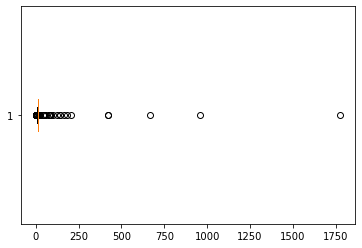

In [74]:
plt.boxplot(df_account_data.rating_numerator, vert = False);


In [42]:
# programmatic assessment account data
df_account_data.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [43]:
# programmatic assessment account data
df_account_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

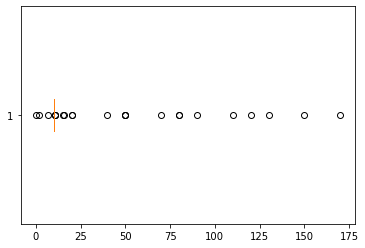

In [76]:
plt.boxplot(df_account_data.rating_denominator, vert = False);

### Programmatics Inspection Findings

**df_account_data**
_Quality Issues_
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- None

### Findings Summary df_account_data
**df_account_data**
_Quality Issues_
- Lack of completeness in columns expanded_urls, doggo, floofer, pupper, puppo
- Validity issue in the name column, where a is a name.
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- Twitter data and dog data in the same table

In [45]:
# visual assessment - look in a spreadsheet program
df_tw.to_csv('tweet_data.csv') # fine

In [46]:
# programmatic assessment tweet data
df_tw.info() # fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   favorite_count  2328 non-null   int64
 2   retweet_count   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [51]:
# programmatic assessment tweet data
df_tw.describe()[['favorite_count', 'retweet_count']].round() # fine
# no comment

,favorite_count,retweet_count
count,2328.0,2328.0
mean,7405.0,2631.0
std,11501.0,4451.0
min,0.0,1.0
25%,1288.0,534.0
50%,3212.0,1230.0
75%,9068.0,3053.0
max,152667.0,75568.0


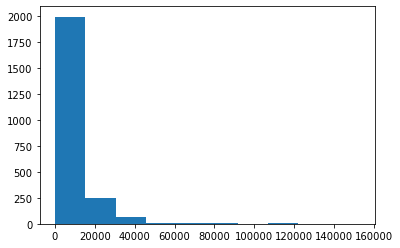

In [62]:
# programmatic assessment tweet data
plt.hist(df_tw.favorite_count);


In [79]:
# programmatic assessment tweet data
df_tw.favorite_count.sort_values()

999          0
544          0
439          0
186          0
187          0
         ...  
1055    112895
129     114076
517     117882
397     130250
1015    152667
Name: favorite_count, Length: 2328, dtype: int64

In [78]:
# programmatic assessment tweet data
df_tw.favorite_count.value_counts()

0        163
405        4
409        4
1584       3
2591       3
        ... 
21069      1
4687       1
10832      1
25169      1
11912      1
Name: favorite_count, Length: 1972, dtype: int64

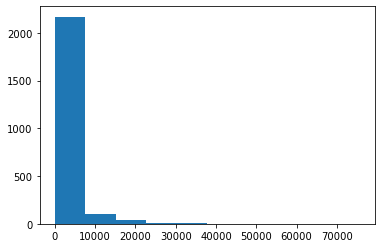

In [80]:
# programmatic assessment tweet data
plt.hist(df_tw.retweet_count);


In [81]:
# programmatic assessment tweet data
df_tw.retweet_count.sort_values()

279         1
1271        2
262         2
328         2
109         3
        ...  
65      39646
397     42556
517     55091
1055    56242
1015    75568
Name: retweet_count, Length: 2328, dtype: int64

In [82]:
# programmatic assessment tweet data
df_tw.retweet_count.value_counts()

41       5
1038     5
547      5
51       5
112      5
        ..
6100     1
27878    1
4063     1
1438     1
2058     1
Name: retweet_count, Length: 1680, dtype: int64

### Findings Summary df_tw
_Tidyness_
- Tidyness issue, all tweet data in the same table

In [ ]:
# visual assessment image predictions
# already present as file - opened in spreadsheet program

In [83]:
# programmatic assessment image prediction
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
# programmatic assessment image prediction
image_predictions.p1_conf.sort_values(ascending=False).round(2)

106     1.00
1299    1.00
1229    1.00
149     1.00
1372    1.00
        ... 
246     0.07
1370    0.06
1093    0.06
136     0.06
38      0.04
Name: p1_conf, Length: 2075, dtype: float64

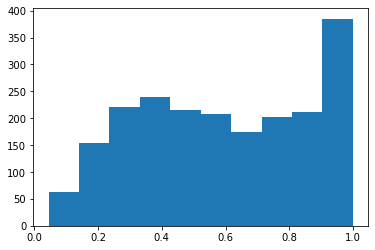

In [93]:
plt.hist(image_predictions.p1_conf);

In [89]:
# programmatic assessment image prediction
image_predictions.p2_conf.sort_values(ascending=False).round(2)

986     0.49
1756    0.47
1514    0.46
232     0.46
72      0.45
        ... 
1372    0.00
230     0.00
1229    0.00
1299    0.00
106     0.00
Name: p2_conf, Length: 2075, dtype: float64

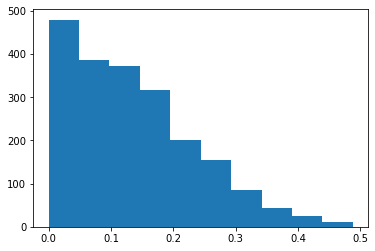

In [94]:
plt.hist(image_predictions.p2_conf);

In [91]:
# programmatic assessment image prediction
image_predictions.p3_conf.sort_values(ascending=False).round(2)

1071    0.27
1080    0.27
97      0.27
123     0.26
1613    0.25
        ... 
1299    0.00
1760    0.00
1906    0.00
149     0.00
106     0.00
Name: p3_conf, Length: 2075, dtype: float64

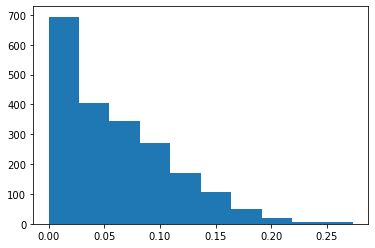

In [95]:
plt.hist(image_predictions.p3_conf);

In [108]:
# programmatic assessment image prediction
image_predictions.p1[image_predictions.p1_dog == True].value_counts()
                           
                           

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Scotch_terrier          1
clumber                 1
Japanese_spaniel        1
groenendael             1
standard_schnauzer      1
Name: p1, Length: 111, dtype: int64

In [109]:
# programmatic assessment image prediction
image_predictions.p2[image_predictions.p2_dog == True].value_counts()
     

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
standard_schnauzer        1
komondor                  1
Bernese_mountain_dog      1
Japanese_spaniel          1
EntleBucher               1
Name: p2, Length: 113, dtype: int64

### Findings Summary image_prediction
**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id
- Consistency issue in p1, p2 and p3 columns, first letter
- Consistency issue in p1, p2 and p3 columns, len - round()
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters
- Treashold for true?

_Tidyness Issues_
- img_num unnecessary column
- The table could have been arranged differently with p, p_conf and p_dog as variables

### Findings Summary
**df_account_data**
_Quality Issues_
- Lack of completeness in columns expanded_urls, doggo, floofer, pupper, puppo
- Validity issue in the name column, where a is a name.
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- Twitter data and dog data in the same table

**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id
- Consistency issue in p1, p2 and p3 columns, first letter
- Consistency issue in p1, p2 and p3 columns, len - round()
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters
- Treashold for true?

_Tidyness Issues_
- img_num unnecessary column
- The table could have been arranged differently with p, p_conf and p_dog as variables

## 2.3 Data Cleaning